<h1> <center>   AMAZON STOCK ANALYSIS

___

<h2> OBJECTIVE

- Stock Price Movement Analysis

- Trading Volume Trends

- Moving Averages Alignment

- MACD Trend Analysis

- Distribution of Daily Returns

- 30-Day Moving Average Comparison

_______

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [3]:
stock= yf.Ticker('AMZN')
df=stock.history(period= '3y')
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-03-01 00:00:00-05:00,152.732498,154.098999,149.977005,151.141998,44874000,0.0,0.0
1,2022-03-02 00:00:00-05:00,150.848999,152.999496,148.750000,152.052505,47334000,0.0,0.0
2,2022-03-03 00:00:00-05:00,153.531494,153.929001,146.856003,147.898499,65198000,0.0,0.0
3,2022-03-04 00:00:00-05:00,147.158997,147.850006,143.807007,145.641006,60934000,0.0,0.0
4,2022-03-07 00:00:00-05:00,145.443497,146.094498,137.416504,137.453003,86934000,0.0,0.0
...,...,...,...,...,...,...,...,...
748,2025-02-24 00:00:00-05:00,217.449997,217.720001,212.419998,212.710007,42387600,0.0,0.0
749,2025-02-25 00:00:00-05:00,211.630005,213.339996,204.160004,212.800003,58958000,0.0,0.0
750,2025-02-26 00:00:00-05:00,214.940002,218.160004,213.089996,214.350006,39120600,0.0,0.0
751,2025-02-27 00:00:00-05:00,218.350006,219.970001,208.369995,208.740005,40548600,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          753 non-null    datetime64[ns, America/New_York]
 1   Open          753 non-null    float64                         
 2   High          753 non-null    float64                         
 3   Low           753 non-null    float64                         
 4   Close         753 non-null    float64                         
 5   Volume        753 non-null    int64                           
 6   Dividends     753 non-null    float64                         
 7   Stock Splits  753 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 47.2 KB


In [6]:
df.shape

(753, 8)

In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
748,2025-02-24 00:00:00-05:00,217.449997,217.720001,212.419998,212.710007,42387600,0.0,0.0
749,2025-02-25 00:00:00-05:00,211.630005,213.339996,204.160004,212.800003,58958000,0.0,0.0
750,2025-02-26 00:00:00-05:00,214.940002,218.160004,213.089996,214.350006,39120600,0.0,0.0
751,2025-02-27 00:00:00-05:00,218.350006,219.970001,208.369995,208.740005,40548600,0.0,0.0
752,2025-02-28 00:00:00-05:00,208.649994,212.619995,206.990005,212.279999,51715400,0.0,0.0


In [8]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
df.describe().round()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,753.0,753.0,753.0,753.0,753.0,753.0,753.0
mean,148.0,150.0,146.0,148.0,56246797.0,0.0,0.0
std,40.0,40.0,40.0,40.0,26885416.0,0.0,1.0
min,83.0,83.0,81.0,82.0,15007500.0,0.0,0.0
25%,115.0,117.0,113.0,115.0,39120600.0,0.0,0.0
50%,141.0,143.0,140.0,141.0,50017300.0,0.0,0.0
75%,181.0,182.0,179.0,180.0,66496700.0,0.0,0.0
max,239.0,243.0,238.0,242.0,272662000.0,0.0,20.0


In [10]:
df['Daily Return'] = df['Close'].pct_change()

In [11]:
df['Year'] = df['Date'].dt.year

In [12]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Year
0,2022-03-01 00:00:00-05:00,152.732498,154.098999,149.977005,151.141998,44874000,0.0,0.0,NaN,2022
1,2022-03-02 00:00:00-05:00,150.848999,152.999496,148.750000,152.052505,47334000,0.0,0.0,0.006024,2022
2,2022-03-03 00:00:00-05:00,153.531494,153.929001,146.856003,147.898499,65198000,0.0,0.0,-0.027320,2022
3,2022-03-04 00:00:00-05:00,147.158997,147.850006,143.807007,145.641006,60934000,0.0,0.0,-0.015264,2022
4,2022-03-07 00:00:00-05:00,145.443497,146.094498,137.416504,137.453003,86934000,0.0,0.0,-0.056220,2022
...,...,...,...,...,...,...,...,...,...,...
748,2025-02-24 00:00:00-05:00,217.449997,217.720001,212.419998,212.710007,42387600,0.0,0.0,-0.017869,2025
749,2025-02-25 00:00:00-05:00,211.630005,213.339996,204.160004,212.800003,58958000,0.0,0.0,0.000423,2025
750,2025-02-26 00:00:00-05:00,214.940002,218.160004,213.089996,214.350006,39120600,0.0,0.0,0.007284,2025
751,2025-02-27 00:00:00-05:00,218.350006,219.970001,208.369995,208.740005,40548600,0.0,0.0,-0.026172,2025


In [13]:
df['Close'].max().round()

242.0

In [14]:
max_close = df[df['Close'] == df['Close'].max()]
max_close

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Year
735,2025-02-04 00:00:00-05:00,239.009995,242.520004,238.029999,242.059998,29713800,0.0,0.0,0.019543,2025


In [14]:
df.max()

Date            2025-02-28 00:00:00-05:00
Open                           239.020004
High                           242.520004
Low                            238.029999
Close                          242.059998
Volume                          272662000
Dividends                             0.0
Stock Splits                         20.0
Daily Return                     0.121778
Year                                 2025
dtype: object

In [15]:
df.sample()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return,Year
154,2022-10-10 00:00:00-04:00,115.099998,116.25,112.43,113.669998,42339700,0.0,0.0,-0.007769,2022


- <h4> Stock Price Movement Analysis

In [5]:
fig = go.Figure(data=[go.Ohlc(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])

fig.update_layout(title="AMZN OHLC Chart",xaxis_title="Date",yaxis_title="Stock Price (USD)",template="plotly_dark")

fig.show()

fig.write_html("amazon_ohlc.html")


- <h4> Trading Volume Trends

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], name='Volume', marker=dict(color='#5B9787')))

fig.update_layout(title="Amazon Trading Volume", xaxis_title="Date",yaxis_title="Volume",template="plotly_dark")

fig.show()

fig.write_html("amazon_trading_volume.html")


- <h4> Moving Averages Alignment

In [ ]:
sma_50= df['Close'].rolling(window=50).mean()
sma_200= df['Close'].rolling(window=200).mean()

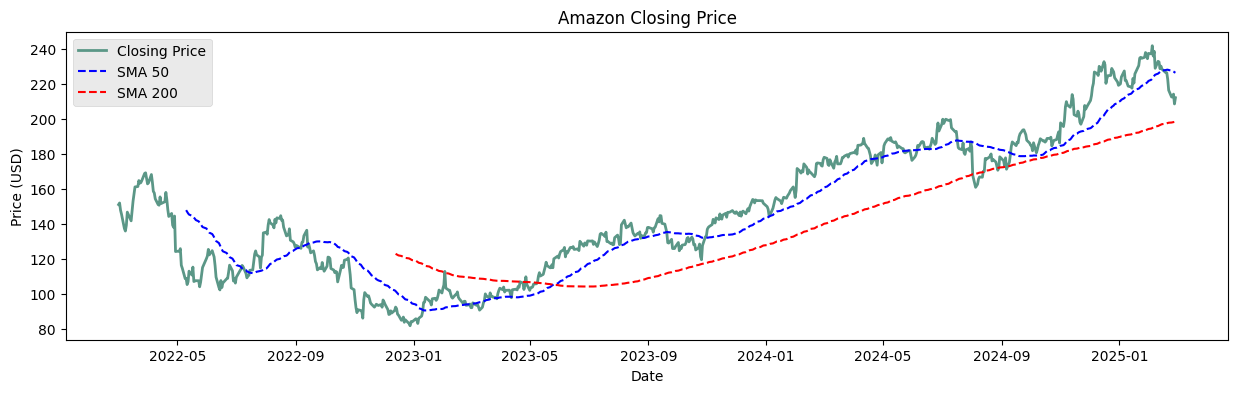

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='#5B9787',linewidth=2)
plt.plot(df['Date'], sma_50, label='SMA 50', color='blue', linestyle='dashed')
plt.plot(df['Date'], sma_200, label='SMA 200', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Amazon Closing Price')
plt.style.use("ggplot")
plt.legend()
plt.show()

- <h4> MACD Trend Analysis

In [ ]:
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()

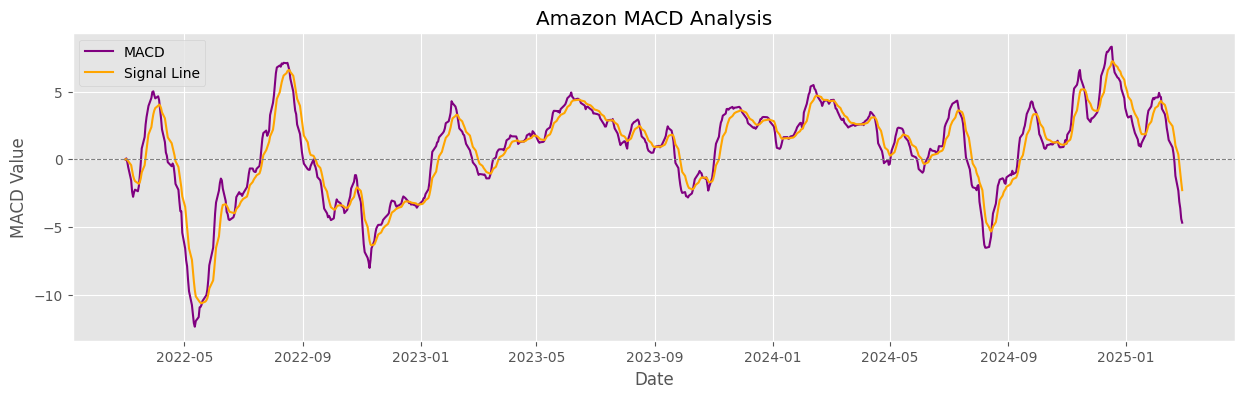

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(df['Date'], macd, label='MACD', color='purple')
plt.plot(df['Date'], signal, label='Signal Line', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('Amazon MACD Analysis')
plt.legend()
plt.show()

- <h4> Distribution of Daily Returns

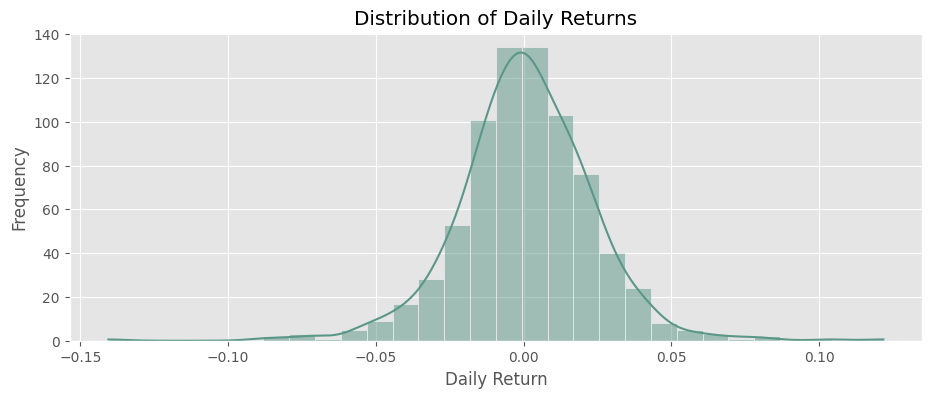

In [ ]:
plt.figure(figsize=(11,4))
sns.histplot(df['Daily Return'], bins=30,kde=True, color='#5B9787')
plt.title('Distribution of Daily Returns')
plt.ylabel('Frequency')
plt.show()

- <h4> 30-Day Moving Average Comparison

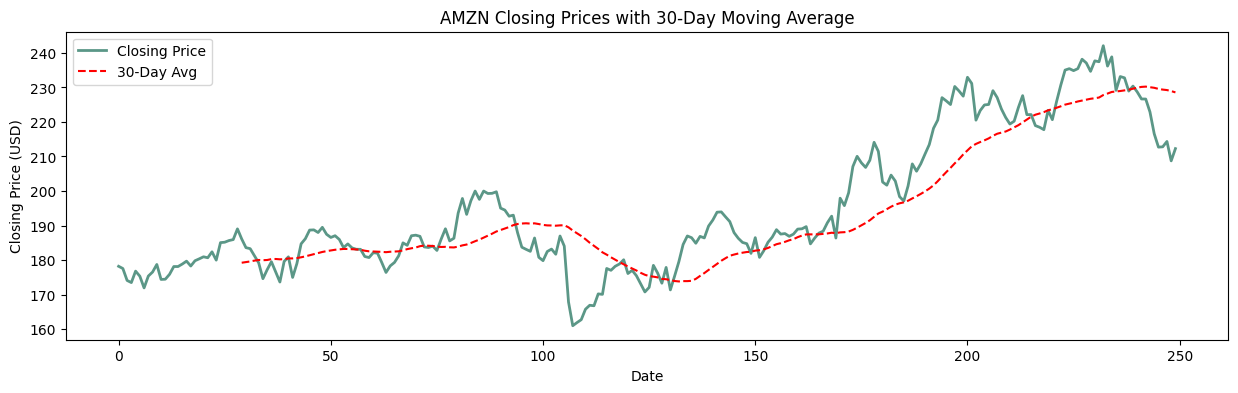

In [ ]:
plt.figure(figsize=(15, 4))
df['Close'].plot(label='Closing Price', color= '#5B9787', linewidth=2)
df['Close'].rolling(window=30).mean().plot(label='30-Day Avg', linestyle='--', color='red')
plt.title( 'AMZN Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()